# [Module 1.1] 로컬 스크래치 훈련 (SageMaker 사용 안함)

본 워크샵의 모든 노트북은 **<font color="red">conda_tensorflow2_p36</font>** 를 사용합니다.

본 노트북(notebook)은 SageMaker 상에서 (1) Keras, (2) Tensorflow 를 배우는 과정을 하기 위한 스크래치 버전 입니다.
이 노트북은 아래와 같은 작업을 합니다.
- 기본 환경 세팅
- CIFAR-10 데이터 세트 다운로드 및 데이터 확인
- 로컬에서 훈련 (단순하게 python train.py 의 형태 임)
- 관련 변수 저장

## 참고:
- 이 페이지를 보시면 Cifar10 데이터 설명 및 기본 모델 훈련이 있습니다. --> [Train a Keras Sequential Model (TensorFlow 2.0)](https://github.com/daekeun-ml/tensorflow-in-sagemaker-workshop/blob/master/0_Running_TensorFlow_In_SageMaker_tf2.ipynb)
    - 메인 깃 리파지토리: [SageMaker Workshop: Tensorflow-Keras 모델을 Amazon SageMaker에서 학습하기](https://github.com/daekeun-ml/tensorflow-in-sagemaker-workshop)

---

# 1. 기본 세팅
사용하는 패키지는 import 시점에 다시 재로딩 합니다.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import tensorflow as tf
print("tensorflow version: ", tf.__version__)

tensorflow version:  2.4.1


# 2. Cifar10 데이터 확인하기
- 랜덤하게 9장의 사진 이미지를 보면서, 데이터를 확인 합니다.
    - 재 실행하면 계속 이미지가 랜덤하게 선택되어서 보여지게 됩니다.

## 데이터 읽기 단계

- `data/cifar10/train/train-tfrecords` 일고  9 batch_size 로 할당하여, TF dataset를 생성 합니다.
- 1 개의 배치 (9개의 이미지, 레이블 포함) 를 읽음
- 1 개의 배치안에 있는 사진 보여주기

In [3]:
import matplotlib.pyplot as plt
from src.utils import _input

batch_size = 9
sample_dir = 'data/cifar10/train'
sample_dataset = _input(1, batch_size, sample_dir, 'train')

images shape:  (9, 32, 32, 3)


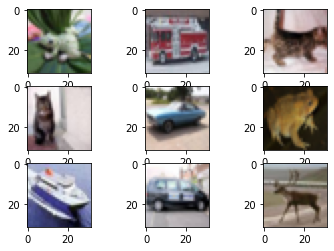

In [4]:
images, labels = iter(sample_dataset).next()
print("images shape: ", images.numpy().shape)
images = images.numpy()

for i in range(batch_size):
    # define subplot
    plt.subplot(330 + 1 + i)
    # plot raw pixel data
    plt.imshow(images[i])
# show the figure
plt.show()

# 3. 노트북 인스턴스 로컬에서 모델 훈련하기 (SageMaker 전혀 사용 안함)

본 스크립트는 모델 학습에 필요한 인자값(arguments)들을 사용합니다. 모델 학습에 필요한 인자값들은 아래와 같습니다.

1. `model_dir` - 로그와 체크 포인트를 저장하는 경로
2. `train, validation, eval` - TFRecord 데이터셋을 저장하는 경로
3. `epochs` - epoch 횟수

아래 명령어로 **<font color='red'>SageMaker 관련 API 호출 없이</font>** 로컬 노트북 인스턴스 환경에서 1 epoch만 학습해 봅니다. 참고로, MacBook Pro(15-inch, 2018) 2.6GHz Core i7 16GB 사양에서 2분 20초~2분 40초 소요됩니다.

## 데이터 경로 지정 및 훈련 파일 실행

In [5]:
data_dir = 'data/cifar10'
train_dir = 'data/cifar10/train'
validation_dir = 'data/cifar10/validation'
eval_dir = 'data/cifar10/eval'

In [6]:
%%time
!mkdir -p logs
!python src/cifar10_keras_tf2.py --model_dir ./logs \
                                         --train {train_dir} \
                                         --validation {validation_dir} \
                                         --eval {eval_dir} \
                                         --epochs 1


args: 
 Namespace(batch_size=128, epochs=1, eval='data/cifar10/eval', learning_rate=0.001, model_dir='./logs', momentum=0.9, optimizer='adam', train='data/cifar10/train', validation='data/cifar10/validation', weight_decay=0.0002)
312/312 [==============================] - 78s 243ms/step - loss: 2.1342 - accuracy: 0.2500 - val_loss: 1.8238 - val_accuracy: 0.3321
INFO:tensorflow:Assets written to: ./logs/1/assets
INFO:tensorflow:Assets written to: ./logs/1/assets
CPU times: user 2.25 s, sys: 270 ms, total: 2.52 s
Wall time: 1min 29s


In [7]:
!rm -rf logs

# 4. 변수 저장

- 다음 노트북에서 사용할 변수 저장

In [8]:
%store train_dir
%store validation_dir
%store eval_dir
%store data_dir

Stored 'train_dir' (str)
Stored 'validation_dir' (str)
Stored 'eval_dir' (str)
Stored 'data_dir' (str)
